# Image Sharpening

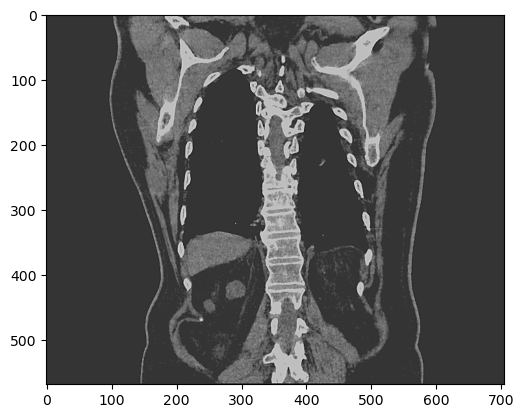

In [8]:
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

img = img_as_float(io.imread("Test!/Cyst- (1).jpg", as_gray=True))

gaussian_img = gaussian(img, sigma=1, mode='constant', cval=0.0)

img2 = (img - gaussian_img)*1.

img3 = img + img2

from matplotlib import pyplot as plt
plt.imshow(img3, cmap="gray")

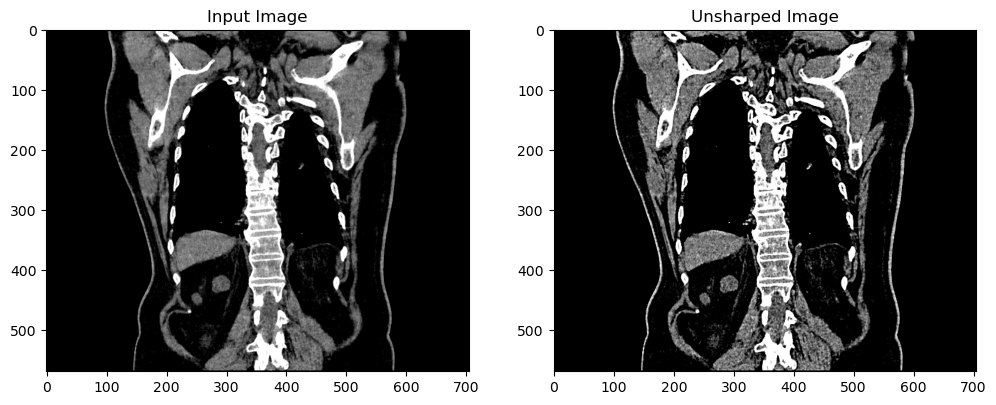

In [10]:
#Unsharp Mask
# from skimage import io
# from skimage.filters import unsharp_mask

img = io.imread("Test!/Cyst- (1).jpg")

#sharpened = unsharp_mask(image0, radius=1.0, amount=1.0)
unsharped_img = unsharp_mask(img, radius=3, amount=1)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(unsharped_img, cmap='gray')
ax2.title.set_text('Unsharped Image')

plt.show()

# Deconvolution

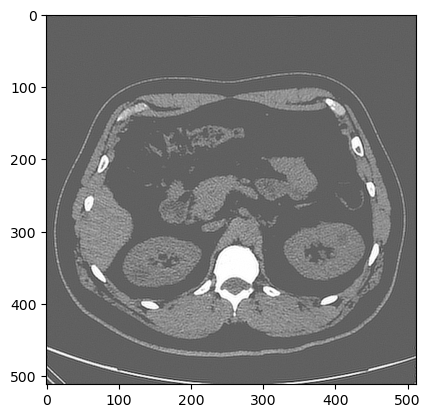

In [16]:
import numpy as np
from skimage import io,restoration
img = io.imread("Test!/Cyst- (2).jpg",as_gray =True)


#PSF

psf = np.ones((3, 3)) / 9  #point spread function to be used for deconvolution.

# print(psf)

deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imshow(deconvolved, cmap='gray')

In [18]:
import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float

img = img_as_float(io.imread("Test!/Cyst- (2).jpg"))
print(img.shape)

#PSF
import scipy.stats as st
import numpy as np

#psf = np.ones((3, 3)) / 9  #point spread function to be used for deconvolution.

#The following page was used as reference to generate the kernel
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

def gkern(kernlen=21, nsig=2):    #Returns a 2D Gaussian kernel.

    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

psf = gkern(5,3)   #Kernel length and sigma
print(psf)


deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave("Test!/Cyst_decon(2).jpg", deconvolved, cmap='gray')

(512, 512, 3)
[[0.003765   0.015019   0.02379159 0.015019   0.003765  ]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.02379159 0.0949073  0.15034262 0.0949073  0.02379159]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.003765   0.015019   0.02379159 0.015019   0.003765  ]]


ValueError: could not broadcast input array from shape (5,5) into shape (5,5,3)

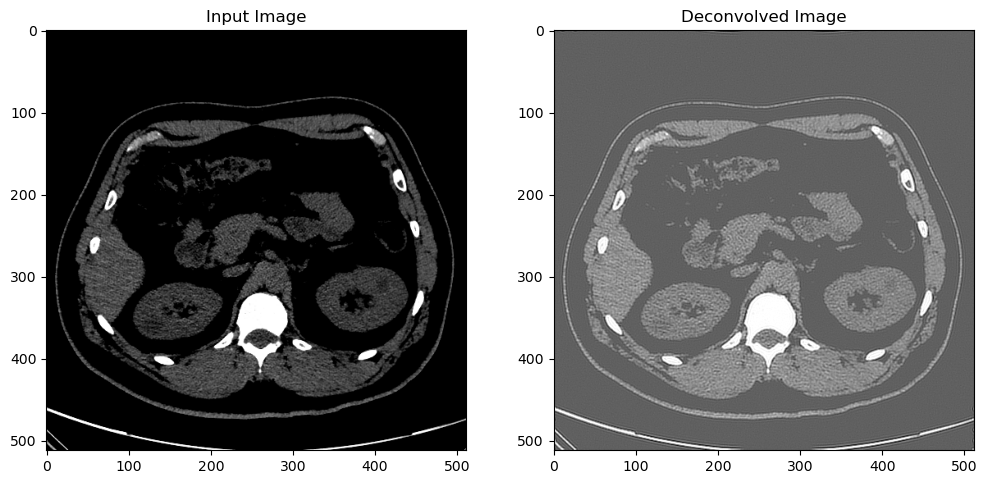

In [20]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(deconvolved, cmap='gray')
ax2.title.set_text('Deconvolved Image')

plt.show()

In [ ]:
!git init
!git add .
!git commit -m "Your commit message here"
!git remote add origin https://github.com/username/repo-name.git
!git push -u origin main